In [73]:
from collections import namedtuple

import networkx as nx
import matplotlib.pyplot as plt
from math import floor

%matplotlib inline

In [25]:
BOARDSIZE = 8
Square = namedtuple('Square', ['row', 'col'])

In [57]:
G = nx.DiGraph()

In [58]:
# initialize list of node
G.add_nodes_from(range(BOARDSIZE**2))

In [59]:
len(G)

64

In [60]:
def rankfile_to_nodeid(row, col, boardsize=BOARDSIZE):
    return row * BOARDSIZE + col

In [79]:
def nodeid_to_rankfile(nodeid, boardsize=BOARDSIZE):
    row = floor(nodeid / boardsize)
    col = nodeid % boardsize
    
    assert row * BOARDSIZE + col == nodeid
    return Square(row, col)

In [61]:
def is_legal_pos(row, col, boardsize=BOARDSIZE):
    if 0 <= row < boardsize:
        if 0 <= col < boardsize:
            return True

    return False

In [62]:
def possible_moves(row, col, boardsize=BOARDSIZE):
    knight_moves = [(1, 2), (-1, 2), (1, -2), (-1, -2),
                    (2, 1), (-2, 1), (2, -1), (-2, -1)]
    
    moves = []
    for move in knight_moves:
        new_row = row + move[0]
        new_col = col + move[1]
        
        if is_legal_pos(new_row, new_col):
            moves.append(Square(new_row, new_col))
        
    return moves

In [63]:
for row in range(BOARDSIZE):
    for col in range(BOARDSIZE):
        current_node = rankfile_to_nodeid(row, col)

        for move in possible_moves(row, col):
            possible_node = rankfile_to_nodeid(move.row, move.col)
            G.add_edge(current_node, possible_node)

/Users/alysivji/.virtualenvs/code_everyday/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/alysivji/.virtualenvs/code_everyday/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/alysivji/.virtualenvs/code_everyday/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/alysivji/.virtualenvs/code_everyday/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarni

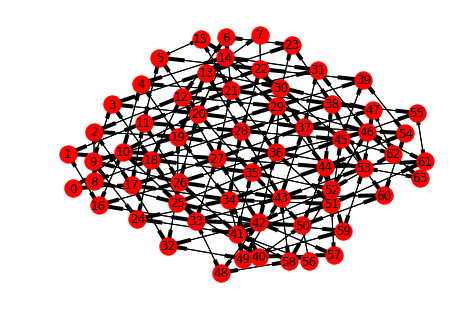

In [64]:
nx.draw(G, with_labels=True)

In [65]:
len(G.edges())

336

In [66]:
len(G)

64

In [70]:
solution = list(nx.dfs_edges(G))

In [71]:
len(solution)

63

In [72]:
solution

[(0, 10),
 (10, 20),
 (20, 30),
 (30, 36),
 (36, 46),
 (46, 52),
 (52, 62),
 (62, 47),
 (47, 53),
 (53, 63),
 (53, 59),
 (59, 49),
 (49, 43),
 (43, 37),
 (37, 31),
 (31, 21),
 (21, 15),
 (15, 5),
 (5, 11),
 (11, 17),
 (17, 27),
 (27, 33),
 (33, 50),
 (50, 60),
 (60, 54),
 (54, 44),
 (44, 38),
 (38, 28),
 (28, 22),
 (22, 12),
 (12, 6),
 (6, 23),
 (23, 29),
 (29, 39),
 (39, 45),
 (45, 55),
 (55, 61),
 (61, 51),
 (51, 57),
 (57, 42),
 (42, 48),
 (48, 58),
 (58, 41),
 (41, 35),
 (35, 25),
 (25, 19),
 (19, 13),
 (13, 7),
 (13, 3),
 (3, 9),
 (9, 26),
 (26, 32),
 (26, 16),
 (16, 1),
 (1, 18),
 (18, 24),
 (24, 34),
 (34, 40),
 (18, 8),
 (8, 2),
 (19, 4),
 (4, 14),
 (41, 56)]

In [85]:
[(nodeid_to_rankfile(curr_square), nodeid_to_rankfile(next_square)) for curr_square, next_square in solution]

[(Square(row=0, col=0), Square(row=1, col=2)),
 (Square(row=1, col=2), Square(row=2, col=4)),
 (Square(row=2, col=4), Square(row=3, col=6)),
 (Square(row=3, col=6), Square(row=4, col=4)),
 (Square(row=4, col=4), Square(row=5, col=6)),
 (Square(row=5, col=6), Square(row=6, col=4)),
 (Square(row=6, col=4), Square(row=7, col=6)),
 (Square(row=7, col=6), Square(row=5, col=7)),
 (Square(row=5, col=7), Square(row=6, col=5)),
 (Square(row=6, col=5), Square(row=7, col=7)),
 (Square(row=6, col=5), Square(row=7, col=3)),
 (Square(row=7, col=3), Square(row=6, col=1)),
 (Square(row=6, col=1), Square(row=5, col=3)),
 (Square(row=5, col=3), Square(row=4, col=5)),
 (Square(row=4, col=5), Square(row=3, col=7)),
 (Square(row=3, col=7), Square(row=2, col=5)),
 (Square(row=2, col=5), Square(row=1, col=7)),
 (Square(row=1, col=7), Square(row=0, col=5)),
 (Square(row=0, col=5), Square(row=1, col=3)),
 (Square(row=1, col=3), Square(row=2, col=1)),
 (Square(row=2, col=1), Square(row=3, col=3)),
 (Square(row=